# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import linear_emulator
import gp_emulator
import data_PD2013
import lya_theory
import fit_linP
import likelihood
import emcee_sampler

### Setup emulator

In [2]:
basedir='../../p1d_emulator/sim_suites/emulator_15052019/'
p1d_label='p1d'
skewers_label='Ns110_wM0.1'
use_gp=False
if use_gp:
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,max_arxiv_size=1000,verbose=True,paramList=None,kmax_Mpc=5,train=True)
else:
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,drop_tau_rescalings=False,drop_temp_rescalings=False,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 2, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'alpha_star': {'ip': 3, 'min_val': -0.265, 'max_val': -0.165, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\alpha_\\star$'}, 'mu_He': {'ip': 4, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}, 'mu_H': {'ip': 5, 'min_val': 0.5, 'max_val': 2.0, '   latex': '$\\mu_{\\rm H}$'}}, 'nsamples': 10, 'samples': {'0': [0.96, 0.32, -2.325, -0.22, 0.875, 1.7750000000000001], '1': [0.966, 0.4, -2.295, -0.23, 1.175, 0.575], '2': [0.968, 0.36, -2.285, -0.26, 1.7750000000000001, 1.625], '3': [0.97, 0.3, -2.315, -0.18, 1.3250000000000002, 1.3250000000000002], '4': [0.974, 0.34, -2.305, -0.21000000000000002, 1.475, 1.175], '5': [

In [3]:
# specify free parameters in likelihood
free_parameters=['ln_tau_0','Delta2_star']

In [4]:
sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,verbose=True,nwalkers=6)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
use default mean flux model
use default thermal model
got parameters
g_star = 0.9677508579459803
f_star = 0.98136955784
Delta2_star = 0.360175905286
n_star = -2.29933566726
alpha_star = -0.216527037121
ln_tau_0 = -0.794580172414
ln_tau_1 = 3.18
ln_T0_0 = 9.21034037198
ln_T0_1 = 0.0
ln_gamma_0 = 0.336472236621
ln_gamma_1 = 0.0
likelihood setup with 2 free parameters
2 free parameters
set 6 walkers with 2 dimensions
0 walker [ 0.87569715  0.65952899]
updated parameters, update theories
updated 1 linP parameters
updated 2 after mean flux parameters
updated 2 after thermal parameters
0 2.2 model {'Delta2_p': 0.58923466743911668, 'n_p': -2.2994794185069711, 'alpha_p': -0.21637589659957113, 'f_p': 0.96522452450210083, 'mF': 0.81382517742641547, 'gamma': 1.3999999999999999, 'sigT_Mpc': 0.13069600926052841}
1 2.4 model {'Delta2_p': 0.52398540817501293, 'n_p': -2.2994795015019927, 'alpha_p': -0.21637671767579217, 'f_p':

In [5]:
sampler.p0

array([[ 0.87569715,  0.65952899],
       [ 0.40400454,  0.92793858],
       [ 0.37756748,  0.88298191],
       [ 0.15953003,  0.99749282],
       [ 0.64747941,  0.34144643],
       [ 0.41745206,  0.64383373]])

In [6]:
for p in sampler.like.free_params:
    print(p.name,p.value)

Delta2_star 0.312617808694
ln_tau_0 -0.878083137339


In [7]:
# debug sampler, but not likelihood
sampler.like.go_silent()
sampler.verbose=True

### Run burn-in and main MCMC chains

In [8]:
sampler.run_burn_in(nsteps=100)

start burn-in, will do 100 steps
parameter values outside hull [ 0.06907752  0.63554672]
parameter values outside hull [ 0.12935064  0.67064228]
parameter values outside hull [ 0.1316858   0.72668391]
parameter values outside hull [ 0.01685579  0.77692128]
parameter values outside hull [ 0.1099602   0.73652006]
parameter values outside hull [ 0.04879734  0.73472726]
finished burn-in


In [9]:
sampler.run_chains(nsteps=200)

0 [ 0.2307198   0.66494385]
20 [ 0.24321195  0.67132622]
40 [ 0.2269386   0.68356763]
60 [ 0.22811879  0.66946752]
80 [ 0.22960967  0.67366001]
100 [ 0.22903316  0.68259575]
120 [ 0.23269184  0.67205829]
140 [ 0.22784144  0.6722215 ]
160 [ 0.23139799  0.6685367 ]
180 [ 0.22528703  0.67769069]


In [10]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.693


### Plot main results from chains (with dimension parameters)

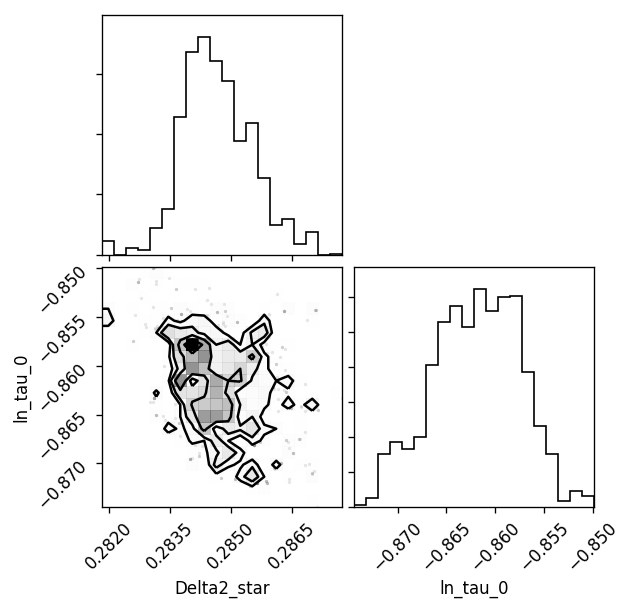

In [11]:
sampler.plot_corner(cube=False)

### Use likelihood object to make several useful plots

In [12]:
# get mean of chain
mcmc_mean=np.mean(sampler.sampler.flatchain,axis=0)
print('mean point',mcmc_mean)

mean point [ 0.23113787  0.67621799]


In [13]:
sampler.like.update_parameters(mcmc_mean)
for p in sampler.like.free_params:
    print(p.name,p.value)

Delta2_star 0.284670681042
ln_tau_0 -0.861891002613


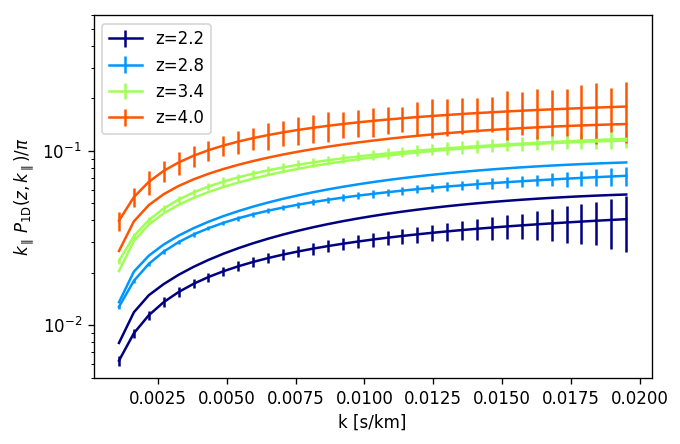

In [14]:
sampler.like.plot_p1d()

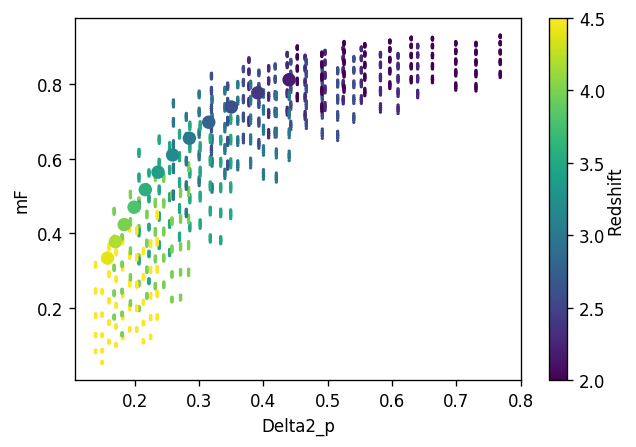

In [15]:
sampler.like.overplot_emulator_calls('Delta2_p','mF')